## Aim : Demonstrate purpose of Feature Scaling and Show that the Feature Scaling does not affect the distribution

**732_Saksham**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Dataset/Social_Network_Ads.csv", usecols=['Age','EstimatedSalary','Purchased'])

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = df.drop('Purchased', axis =1)

y = df['Purchased']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=5)

In [32]:
x_train.shape

(280, 2)

In [33]:
x_test.shape

(120, 2)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scalar = StandardScaler()

In [36]:
scalar.fit(x_train)

# first fit to learn then fit_transform to apply

StandardScaler()

In [37]:
x_train_scaled = scalar.fit_transform(x_train)

In [38]:
scalar.fit(x_test)


StandardScaler()

In [39]:
x_train_scaled = scalar.fit_transform(x_test)

In [40]:
scalar.mean_

# mean of first and second column

array([3.7275e+01, 7.1525e+04])

In [41]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_train_scaled, columns = x_test.columns)

In [42]:
x_train_scaled.head()

,Age,EstimatedSalary
0,0.814262,0.704578
1,-1.705517,-1.310558
2,-0.118990,-0.562079
3,-1.238891,-1.137832
4,0.160986,0.157612


In [43]:
new_df = pd.DataFrame(x_train_scaled, columns= ['Age','EstimatedSalary'])

new_df.head()

,Age,EstimatedSalary
0,0.814262,0.704578
1,-1.705517,-1.310558
2,-0.118990,-0.562079
3,-1.238891,-1.137832
4,0.160986,0.157612


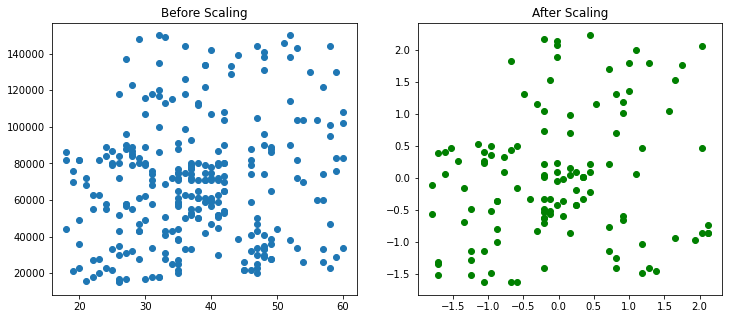

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")



ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color ="Green")
ax2.set_title("After Scaling")

plt.show()

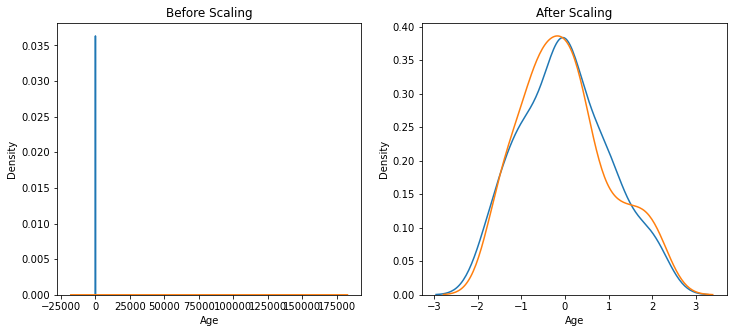

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'], ax =ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax =ax1)

ax2.set_title('After Scaling')
sns.kdeplot(new_df['Age'], ax =ax2)
sns.kdeplot(new_df['EstimatedSalary'], ax =ax2)

plt.show()

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

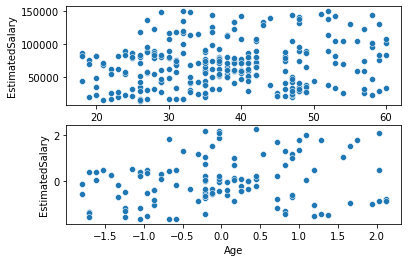

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(2)

sns.scatterplot(x_train['Age'], x_train['EstimatedSalary'], ax=axes[0])

sns.scatterplot(new_df['Age'], new_df['EstimatedSalary'], ax=axes[1])
